**Data preprocessing /Ahmed Tamer**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import re
import string
import nltk
from wordcloud import WordCloud,STOPWORDS
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive              #For google colab run.                        
drive.mount('/content/drive/')             

#fake_path=r"F:\Data_science(Uni)\NLPdataset\Fake.csv"      for local run
#true_path=r"F:\Data_science(Uni)\NLPdataset\True.csv"


fake_path='/content/drive/MyDrive/NLP/Fake.csv'
true_path='/content/drive/MyDrive/NLP/True.csv'

Mounted at /content/drive/


In [ ]:
true_data=pd.read_csv(true_path)
true_data.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
fake_data=pd.read_csv(fake_path)
fake_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
true_data['label'] = 'true'
fake_data['label'] = 'fake'

In [ ]:
true_data.shape,fake_data.shape

((21417, 5), (23481, 5))

In [ ]:
data = pd.concat([true_data,fake_data])
data.sample(15)

,title,text,subject,date,label
6898,Sarah Palin Humiliates Herself By Picking A F...,After learning that Bill Nye had been very pub...,News,"April 14, 2016",fake
3714,Ellen DeGeneres Wasn’t Being Allowed Into The...,"Tuesday at the White House, several people are...",News,"November 22, 2016",fake
8533,California mayor charged in youth camp strip p...,"(Reuters) - The mayor of Stockton, California,...",politicsNews,"August 4, 2016",true
21755,MOTHER OUTRAGED OVER DAUGHTER BEING ASKED TO A...,Not that anyone should be surprised by this in...,left-news,"May 10, 2015",fake
3458,Lisa Bloom Has FRIGHTENING Warning For The Fu...,Donald Trump is a misogynist. We all know that...,News,"December 11, 2016",fake
1594,China says to ban some petroleum exports to No...,SHANGHAI (Reuters) - China said on Saturday it...,politicsNews,"September 23, 2017",true
12544,"Merkel, Social Democrats seek clarity on coali...",BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,"December 11, 2017",true
14590,Pro-business FDP says upbeat that German coali...,"BERLIN (Reuters) - Christian Lindner, head of ...",worldnews,"November 17, 2017",true
8764,WATCH: Paul Ryan Reveals This Really Weird Re...,Paul Ryan sat down for an interview with USA T...,News,"January 14, 2016",fake
12241,LIBERAL TREVOR NOAH Didn’t Count On Conservati...,,politics,"Dec 2, 2016",fake


**Describe the data**

In [ ]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


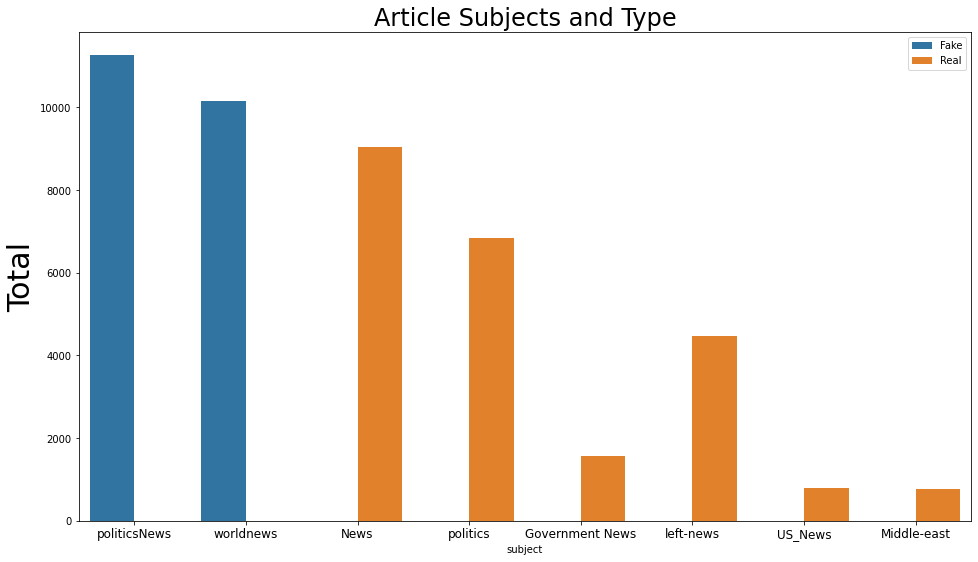

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='label', data=data)
plt.title('Article Subjects and Type', fontsize=24)
plt.ylabel('Total', fontsize=30)
plt.xticks(fontsize=12)
plt.legend(['Fake', 'Real'])
plt.show()

In [ ]:
data['text']=data['title'] + " " + data['text']
del data['date']
del data['subject']
del data['title']
data.sample(10)


,text,label
13226,KREEPY KAINE Says Voting For Hillary Will Help...,fake
15614,Saudi's Al-Tayyar says work continues despite ...,true
16846,MUSLIM BROTHERHOOD AFFILIATE INVITED To Obama’...,fake
4485,Republican Gov Wrecked Economy So Bad He’s St...,fake
11062,OBAMA’S A SELLOUT: Speech For Wall Street Pays...,fake
22648,"BOILER ROOM – EP #46 – Murder, Witchery, Polit...",fake
9881,U.S. says Kerry to meet Iran foreign minister ...,true
13616,WOW! STATE DEPARTMENT Lies Again About The Big...,fake
10147,Clinton warns of possible Trump Supreme Court ...,true
16191,ALARM TURNED OFF: Shocking Details on WHITE HO...,fake


In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)
print(stop_words)

{'few', 'o', 'any', 'shan', 'had', '#', 'weren', "weren't", 'by', 'will', 'you', 'before', 'between', "couldn't", "needn't", "won't", 'all', 'mustn', '+', 'itself', 'at', '$', "it's", 'each', 'off', 'while', '.', 'down', 'she', '<', 'into', 'ours', 'further', 'if', 'the', '&', "you're", 'other', 'were', 'when', 'through', "hasn't", 'being', 'yourselves', 't', 'didn', 'aren', 'an', 'ourselves', 'or', 'our', 'won', 'd', "you'd", "don't", 'm', '\\', 'where', "that'll", ']', '{', 'i', 'don', 'under', 'haven', 'his', '@', 'themselves', '-', 'was', 'been', "isn't", 'me', 'as', 'have', '|', '`', 'after', 'wouldn', 'whom', 'here', 'how', "aren't", 'no', "'", 'he', 'himself', 'up', 'these', 'of', 'they', "she's", 'once', 'same', 'a', "mightn't", 'so', 'its', 'to', '=', '_', 'just', "doesn't", '%', ')', 'has', 'too', 'about', 'which', ',', 'your', 'most', 'some', '(', 'did', 'ma', 'again', 'both', 'nor', 'only', "hadn't", "wouldn't", 'out', 'am', "you'll", 'below', 'than', 'who', 'isn', ':', '~'

In [ ]:
def remove_brackets(news_text):                                 #remove any brackets
    return re.sub('\[[^]]*\]', '', news_text)

def remove_links(news_text):                                    #remove any provided links within the news
    return re.sub(r'http\S+', '',news_text)

def remove_stopwords(news_text):                                #clear the stop and punctuations.
    final_news_text = []
    for word in news_text.split():
        if word.strip().lower() not in stop_words:
            final_news_text.append(word.strip())
    return " ".join(final_news_text)                                #put back spaces between words.

# One function to apply all functions.
def clean_text(text):
    text = remove_brackets(text)
    text = remove_links(text)
    text = remove_stopwords(text)
    return text
data['text']=data['text'].apply(clean_text)

In [ ]:
data.sample(20)

,text,label
12321,Suicide bomber kills least 18 police academy S...,true
986,"No, Democratic Base Ready Get Rid Nancy Pelosi...",fake
2003,Trump likely rescind Obama 'Dreamer' program: ...,true
4574,U.S. imposes duties finding seven producers du...,true
14860,"Lebanese patriarch, Saudi, says supports reaso...",true
6663,New Carly Fiorina Website Gets Pushed Directly...,fake
1314,Tesla CEO Elon Musk Sends Massive Threat Trump...,fake
14310,DONALD TRUMP STRIKES BACK: Reminds American Vo...,fake
1083,New Poll: Trump Making Others Popular – Aren’t...,fake
6767,Tillerson choice raises questions corporate vs...,true


<function matplotlib.pyplot.show>

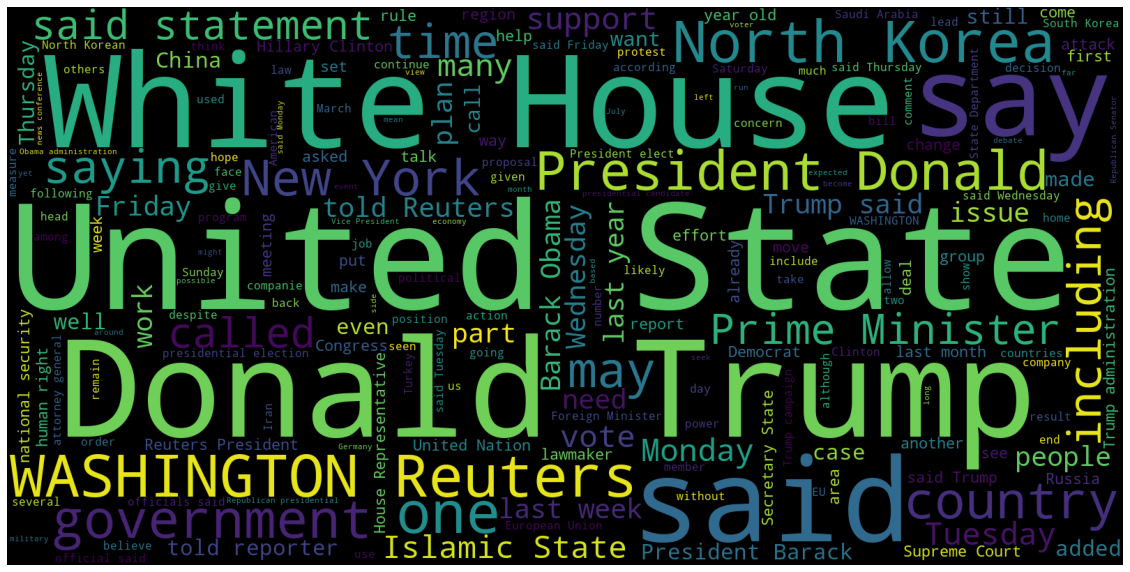

In [ ]:
plt.figure(figsize = (20,20)) # Text from the real news articles
word_cloud_true = WordCloud( width = 1600 , height = 800 ).generate(" ".join(data[data.label == "true"].text))
plt.imshow(word_cloud_true)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

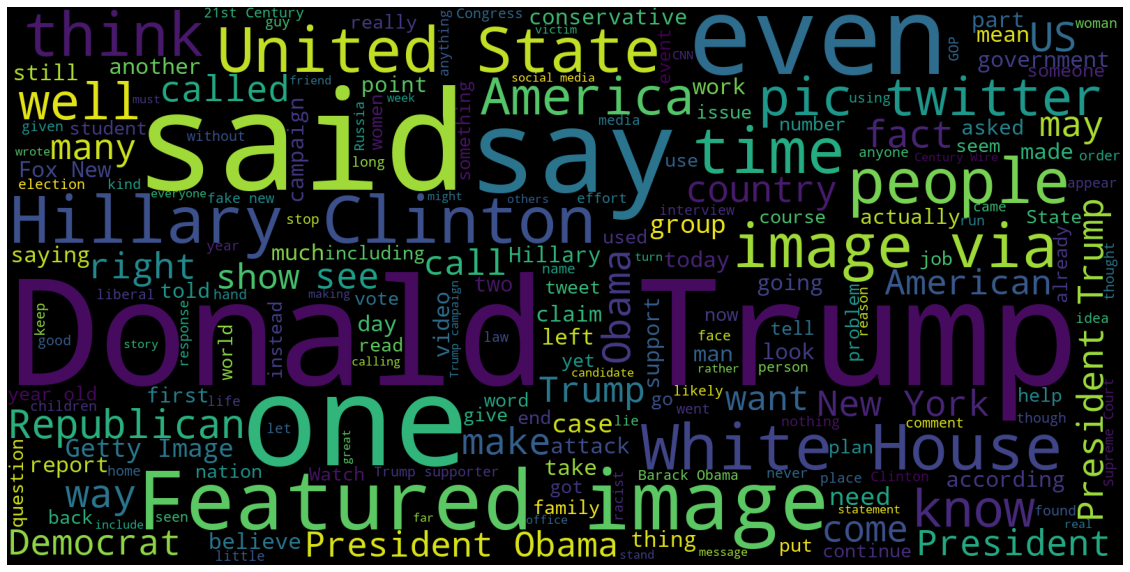

In [ ]:
plt.figure(figsize = (20,20)) # Text from the fake news articles
word_cloud_fake = WordCloud( width = 1600 , height = 800 ).generate(" ".join(data[data.label == "fake"].text))
plt.imshow(word_cloud_fake ) #Display data as an image, i.e., on a 2D regular raster.
plt.axis("off")
plt.show

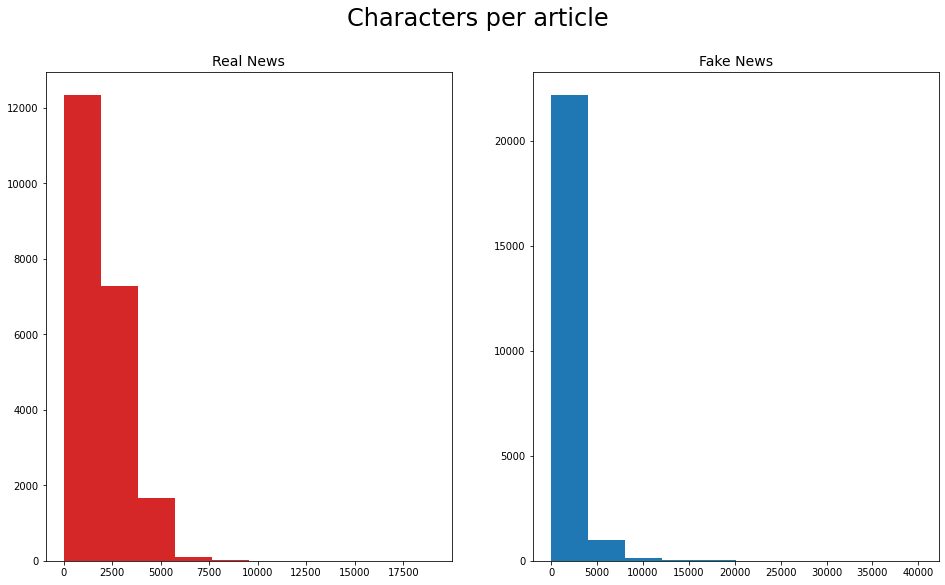

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_length=data[data['label']=="true"]['text'].str.len()
ax1.hist(text_length,color='tab:red')
ax1.set_title('Real News', fontsize=14)
text_length=data[data['label']=="fake"]['text'].str.len()
ax2.hist(text_length,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Characters per article', fontsize=24)
plt.show()

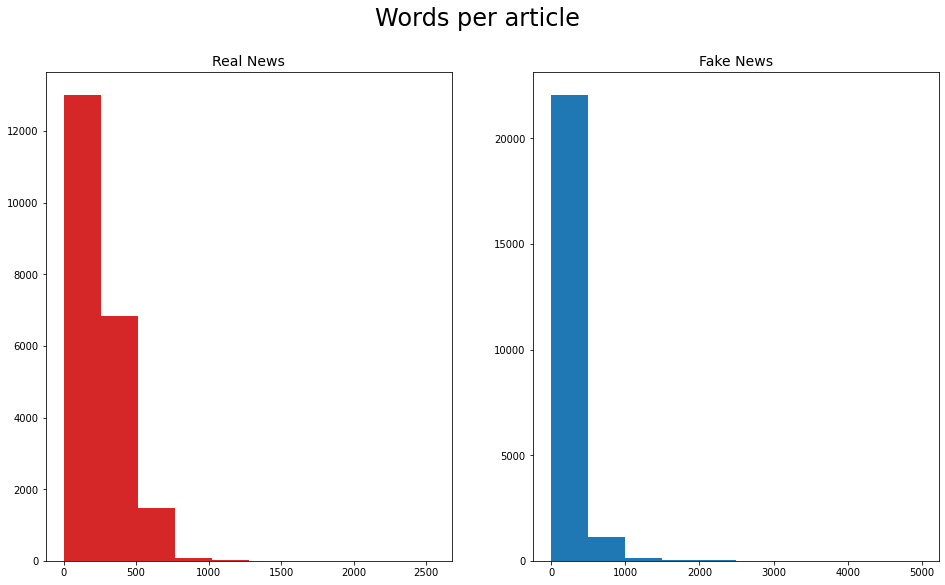

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=data[data['label']=="true"]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tab:red')
ax1.set_title('Real News', fontsize=14)
text_len=data[data['label']=="fake"]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Words per article', fontsize=24)
plt.show()

**SVM/Zeyad Mohammed**

In [ ]:
#import packages
from sklearn.model_selection import train_test_split #spliting our training and test dataset
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
vect = TfidfVectorizer() #Convert a collection of raw documents to a matrix of TF-IDF features.
features = vect.fit_transform(data['text'])
features.shape

(44898, 117971)

In [ ]:
dummy = pd.get_dummies(data['label'])#get data of true and fake by 0 and 1
dummy.head()

,fake,true
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = pd.concat((data,dummy),axis=1) #add dummy to data
df.head()

,text,label,fake,true
0,"U.S. budget fight looms, Republicans flip fisc...",true,0,1
1,U.S. military accept transgender recruits Mond...,true,0,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,true,0,1
3,FBI Russia probe helped Australian diplomat ti...,true,0,1
4,Trump wants Postal Service charge 'much more' ...,true,0,1


In [ ]:
df=df.drop(['label'], axis=1) #drop label column
df.head()

,text,fake,true
0,"U.S. budget fight looms, Republicans flip fisc...",0,1
1,U.S. military accept transgender recruits Mond...,0,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0,1
3,FBI Russia probe helped Australian diplomat ti...,0,1
4,Trump wants Postal Service charge 'much more' ...,0,1


In [ ]:
df=df.drop(['fake'], axis=1) #drop fake column
df.head()

,text,true
0,"U.S. budget fight looms, Republicans flip fisc...",1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much more' ...,1


In [ ]:
df=df.rename(columns={"true":'type'}) #renam true to type
df.sample(10)# print sample of df

,text,type
12705,"U.S. credibility Israel, Palestinians: Haley U...",1
1283,Trump healthcare order could run afoul retirem...,1
22226,FAKE NEWS WEEK: Electronic Voting – Big Lie Wo...,0
12053,THOMAS SOWELL’S FINAL COLUMN: “…too many schoo...,0
20220,U.N. seeks 'massive' aid boost amid Rohingya '...,1
16478,RUDY GIULIANI BLEW Hillary’s Phony “Khantrover...,0
7703,"Clinton warns complacency, Trump warns World W...",1
6033,White House pledges aid help Chicago quell vio...,1
18818,HOLY MOLY! Rebel Media Uncovers ILLEGAL USA-Ca...,0
17312,"BREAKING: THIEVES STEAL IRS INFO 100,000 TAXPA...",0


In [ ]:
features_shuffled, labels_shuffled = shuffle(features, df['type']) #shuffle label and txts 
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_shuffled, 
                                                    labels_shuffled, 
                                                    stratify=labels_shuffled,
                                                    random_state=42,
                                                    test_size=0.20) #split train and test data
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((35918, 117971), (8980, 117971), (35918,), (8980,))

In [ ]:
model = LinearSVC()
model.fit(X_train1, y_train1) #training data 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predict_news = model.predict(X_test1) #predticing on unseen data
print("Accuracy: ",accuracy_score(y_test1,predict_news))

Accuracy:  0.9969933184855234


In [ ]:
print(classification_report(y_test1, model.predict(X_test1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



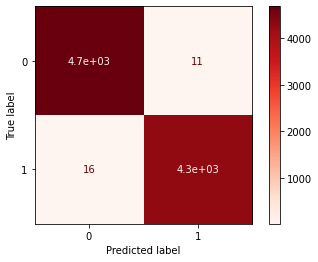

In [ ]:
plot_confusion_matrix(model, X_test1, y_test1, cmap=plt.cm.Reds) #(0,0) True Pos (1,1) True Neg TRUE TEST -- (1,0) False Pos (0,1) False Neg FALSE TEST


# **CNN Classifier/Mostafa Abd Elaziz**


Importing Libs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras.models import Sequential
from sklearn.metrics import accuracy_score


**Data pre processing**

splitting the data into tarin and validationand test


In [ ]:
CNN_data=data
texts = CNN_data['text']
labels = CNN_data['label']
x=texts
y=labels
CNN_data.info

<bound method DataFrame.info of                                                     text label
0      U.S. budget fight looms, Republicans flip fisc...  true
1      U.S. military accept transgender recruits Mond...  true
2      Senior U.S. Republican senator: 'Let Mr. Muell...  true
3      FBI Russia probe helped Australian diplomat ti...  true
4      Trump wants Postal Service charge 'much more' ...  true
...                                                  ...   ...
23476  McPain: John McCain Furious Iran Treated US Sa...  fake
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  fake
23478  Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...  fake
23479  Blow $700 Million: Al Jazeera America Finally ...  fake
23480  10 U.S. Navy Sailors Held Iranian Military – S...  fake

[44898 rows x 2 columns]>

In [ ]:
# vectorize the text samples into a 2D integer tensor 

MAX_SEQUENCE_LENGTH = 5000
MAX_NUM_WORDS = 25000
EMBEDDING_DIM = 300
TEST_SPLIT = 0.2


In [ ]:

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
data1 = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data1.shape)
print('Shape of label tensor:', labels.shape)


Found 141867 unique tokens.
Shape of data tensor: (44898, 5000)
Shape of label tensor: (44898,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data1, 
                                                  labels.apply(lambda x: 0 if x == 'fake' else 1), 
                                                  test_size=TEST_SPLIT)
x_test=x_val[:20]
y_test=y_val[:20]
x_val=x_val[21:]
y_val=y_val[21:]


**ML Model**

In [ ]:
MAX_SEQUENCE_LENGTH = 5000
MAX_NUM_WORDS = 25000
EMBEDDING_DIM = 300
TEST_SPLIT = 0.2
model = Sequential(
    [
        # part 1: word and sequence processing
        layers.Embedding(num_words,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=True),
        layers.Conv1D(128, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        
        # part 2: classification
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])



Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',# Root Mean Square Propogation 
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 300)         7500300   
_________________________________________________________________
conv1d (Conv1D)              (None, 4996, 128)         192128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 7,709,069
Trainable params: 7,709,069
Non-trainable params: 0
_________________________________________________________________


Fitting the Model

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=1,
                    validation_data=(x_val, y_val))

281/281 [==============================] - 4084s 14s/step - loss: 0.1147 - accuracy: 0.9562 - val_loss: 0.0025 - val_accuracy: 0.9991


**Prediction and Accuracy**

In [ ]:

pred = model.predict(x_test)


In [ ]:
for i in range(len(pred)):

    if(pred[i] > 0.5):
        pred[i] = 1

    else:
        pred[i] = 0

print(pred)
print(y_test)


[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]
48       0
10369    1
12974    1
18431    0
19934    1
8032     1
2315     0
4332     0
14000    1
1688     0
3900     1
8909     0
12395    0
7256     0
4694     1
7494     0
3230     0
14031    1
1357     1
21837    0
Name: label, dtype: int64


# **Mohammed Ibrahim**

In [ ]:
data.head(10)

,text,label
0,"U.S. budget fight looms, Republicans flip fisc...",true
1,U.S. military accept transgender recruits Mond...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,true
3,FBI Russia probe helped Australian diplomat ti...,true
4,Trump wants Postal Service charge 'much more' ...,true
5,"White House, Congress prepare talks spending, ...",true
6,"Trump says Russia probe fair, timeline unclear...",true
7,Factbox: Trump Twitter (Dec 29) Approval ratin...,true
8,Trump Twitter (Dec 28) Global Warming followin...,true
9,Alabama official certify Senator-elect Jones t...,true


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(data['text'],data.label,test_size=0.2,random_state=2020)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
pe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])
model = pe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.5%


In [ ]:
print(confusion_matrix(y_test, prediction))

[[4667   15]
 [  30 4268]]


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4682
        true       1.00      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       1.00      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## **KNN Algorithm/Youssef Hesham**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
p = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',  KNeighborsClassifier(n_neighbors=2,weights = 'distance',algorithm = 'brute'))])
model = p.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 76.64%


In [ ]:
print(confusion_matrix(y_test, prediction))

[[4542  140]
 [1958 2340]]


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.70      0.97      0.81      4682
        true       0.94      0.54      0.69      4298

    accuracy                           0.77      8980
   macro avg       0.82      0.76      0.75      8980
weighted avg       0.82      0.77      0.75      8980





```
# This is formatted as code
```

**Logistic regression /Ahmed Rabea**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.text)
y = data.label

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

regression = LogisticRegression()

regression.fit(X_train,y_train)

y_pred = regression.predict(X_test) 

a = accuracy_score(y_pred,y_test)

print ('Accuracy is : ', a*100)

Accuracy is :  98.73051224944321


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4735
        true       0.99      0.99      0.99      4245

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



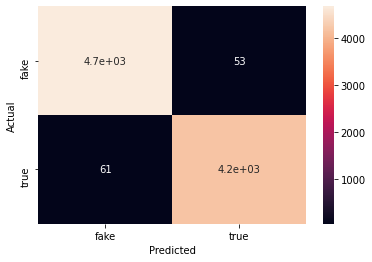

In [ ]:
 confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
